# Week 2 Exploratory Data Analysis
## Report For XYZ

Hypothesis Report Located at bottom.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing and Exploring the DataSet

In [2]:
cab_data = pd.read_csv('DataInternship/Week2_Cab_EDA/DataSets-main/Cab_Data.csv')
city_data = pd.read_csv('DataInternship/Week2_Cab_EDA/DataSets-main/City.csv')
customer_data = pd.read_csv('DataInternship/Week2_Cab_EDA/DataSets-main/Customer_ID.csv')
trans_data = pd.read_csv('DataInternship/Week2_Cab_EDA/DataSets-main/Transaction_ID.csv')

## Explore Cab Data

In [5]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [6]:
cab_data.shape

(359392, 7)

In [7]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### Dealing with missing values

In [8]:
cab_data.isnull().sum().sum()

0

### Visualize data

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price Charged', ylabel='Density'>

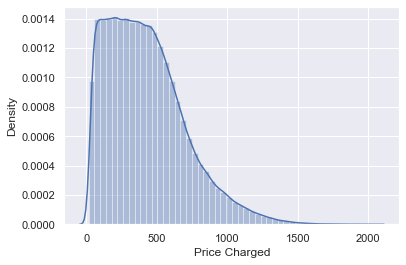

In [9]:
#histogram of price 
sns.distplot(cab_data['Price Charged'])

The distribution is moderately right skewed, more than half of all trips are less than 500

In [10]:
print("Skewness: %f" % cab_data['Price Charged'].skew())

Skewness: 0.873761


E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM Travelled', ylabel='Density'>

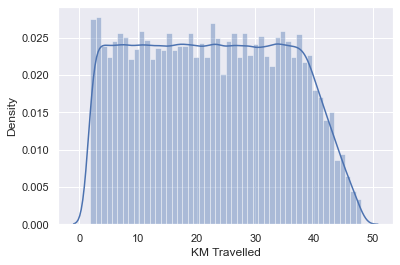

In [12]:
#histogram of distance
sns.distplot(cab_data['KM Travelled'])

In [16]:
#Types of companies
cab_data.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [3]:
#Avg Price Charged for each company
pink_cab_data = cab_data.loc[cab_data['Company'] == 'Pink Cab']
yellow_cab_data = cab_data.loc[cab_data['Company'] == 'Yellow Cab']

In [21]:
pink_cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,8.471100e+04,84711.000000,84711.000000,84711.000000,84711.000000
mean,1.022394e+07,42975.183435,22.559917,310.800856,248.148682
std,1.261782e+05,305.502235,12.231092,181.995661,135.403345
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011014e+07,42700.000000,12.000000,159.970000,131.868000
50%,1.022590e+07,43000.000000,22.440000,298.060000,246.330000
75%,1.033642e+07,43252.000000,32.960000,441.505000,360.180000
max,1.043762e+07,43465.000000,48.000000,1623.480000,576.000000


In [20]:
yellow_cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,2.746810e+05,274681.000000,274681.000000,274681.000000,274681.000000
mean,1.021978e+07,42960.640022,22.569517,458.181990,297.922004
std,1.269829e+05,307.990287,12.234298,288.386166,162.548986
min,1.000038e+07,42371.000000,1.900000,20.730000,22.800000
25%,1.011084e+07,42695.000000,11.990000,226.680000,158.400000
50%,1.021987e+07,42984.000000,22.440000,425.060000,295.596000
75%,1.032939e+07,43225.000000,32.960000,633.880000,432.432000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


####  Although both companies had similar distance travelled per trip, yellow cab company had an average cost per trip of 458 vs 310 for pink cab company. 

### Profit Visualizations

In [4]:
cab_price_charged = [yellow_cab_data['Price Charged'].mean(), pink_cab_data['Price Charged'].mean()]
cab_price_cost = [yellow_cab_data['Cost of Trip'].mean(), pink_cab_data['Cost of Trip'].mean()]

cab_profit = np.subtract(np.array(cab_price_charged),(np.array(cab_price_cost)))
cab_profit

array([160.25998584,  62.65217411])

<AxesSubplot:xlabel='cab_comp'>

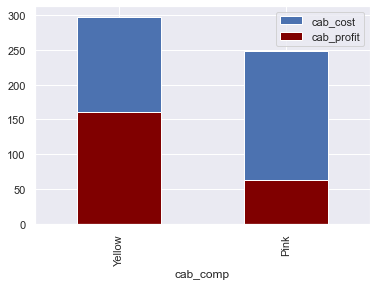

In [157]:
df = pd.DataFrame({
    'cab_comp': ['Yellow', 'Pink'],
    'cab_cost': cab_price_cost,
    'cab_profit': cab_profit
})

prof_plt = df.plot(x="cab_comp", y='cab_cost', kind='bar')
df.plot(x="cab_comp", y='cab_profit', kind="bar", ax=prof_plt, color="maroon")

In [158]:
df

,cab_comp,cab_cost,cab_profit
0,Yellow,297.922004,160.259986
1,Pink,248.148682,62.652174


#### Pink company has higher average costs per ride which shrinks the margin for profit.

# City Data and Customer Visualization

In [35]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [36]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [6]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
customer_data['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Density'>

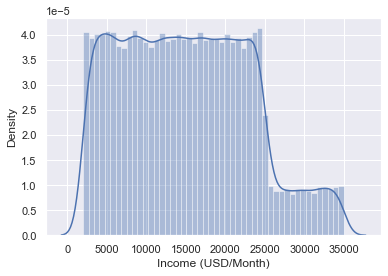

In [14]:
sns.distplot(customer_data['Income (USD/Month)'])

### Transaction Data Visualization

In [15]:
trans_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [16]:
trans_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


#### The transaction data holds both transaction ID and customer ID, so we can merge the dataframes based on these IDs

### Combining Transaction Data, Customer Data, and Cab Data

In [24]:
data_merged = pd.merge(customer_data, trans_data)
data_merged.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID
count,440098.000000,440098.000000,440098.000000,4.400980e+05
mean,23619.513120,35.360197,15092.181989,1.022006e+07
std,21195.549816,12.582668,7987.309505,1.270455e+05
min,1.000000,18.000000,2000.000000,1.000001e+07
25%,3530.000000,25.000000,8391.000000,1.011004e+07
50%,15168.000000,33.000000,14767.000000,1.022006e+07
75%,43884.000000,42.000000,21084.000000,1.033008e+07
max,60000.000000,65.000000,35000.000000,1.044011e+07


In [18]:
data_merged.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


#### Now adding in cab data based on transaction ID

In [25]:
data_merged = pd.merge(data_merged, cab_data)
data_merged.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


#### Now that we have all the data in one dataframe, we can explore more deeply customer trends.

##### First lets rename columns

In [26]:
data_merged.rename(columns = {'Customer ID': 'CID', 'Income (USD/Month)': 'Income', 'Transaction ID': 'TID', 
                              "Date of Travel": "Date", 'KM Travelled': "KM_Travelled", 'Price Charged': 'Price_Charged',
                              'Cost of Trip': 'Cost_of_Trip'}, inplace = True)
data_merged.head()

,CID,Gender,Age,Income,TID,Payment_Mode,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [27]:
#Adding in a profit column
data_merged['Profit'] = data_merged.apply(lambda row: row.Price_Charged - row.Cost_of_Trip, axis=1)
data_merged

,CID,Gender,Age,Income,TID,Payment_Mode,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,12490,Male,33,18713,10439799,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,41414,Male,38,3960,10439838,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,41677,Male,23,19454,10439840,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


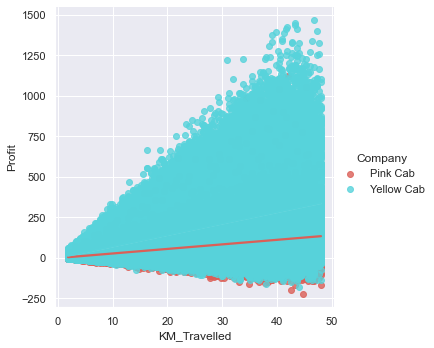

In [38]:
#distance travelled vs profit
ax = sns.lmplot(x="KM_Travelled", y="Profit", hue="Company", data=data_merged, palette="hls")


#### This graph shows that the Yellow Cab company makes significantly more profit as distance travelled increases.

#### Convert the date from xlrd format to datetime to find seasonality comparisons

In [28]:
data_merged['Date'] = pd.to_datetime(data_merged['Date'], unit='D', origin='1899-12-30')

In [17]:
data_merged

,CID,Gender,Age,Income,TID,Payment_Mode,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656
359388,12490,Male,33,18713,10439799,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980
359389,41414,Male,38,3960,10439838,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100
359390,41677,Male,23,19454,10439840,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600


In [14]:
yearly_groups = data_merged.groupby(data_merged.Date.dt.year)['Company', 'Profit']

C:\Users\kfiel\AppData\Local\Temp\ipykernel_5484\4055315063.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearly_groups = data_merged.groupby(data_merged.Date.dt.year)['Company', 'Profit']


In [15]:
yearly_profit = data_merged.groupby(data_merged['Date'].dt.year).agg({'Profit': sum})


In [29]:
yellow_cab_data = data_merged.loc[data_merged['Company'] == 'Yellow Cab']
pink_cab_data = data_merged.loc[data_merged['Company'] == 'Pink Cab']

In [30]:
yellow_yearly_profit = yellow_cab_data.groupby(data_merged['Date'].dt.year).agg({'Profit': sum})
pink_yearly_profit = pink_cab_data.groupby(data_merged['Date'].dt.year).agg({'Profit': sum})

yellow_yearly_profit.head()


,Profit
Date,
2016,1.392700e+07
2017,1.657598e+07
2018,1.351740e+07


In [85]:
pink_yearly_profit.head()

,Profit
Date,
2016,1713511.224
2017,2033654.908
2018,1560162.189


<AxesSubplot:xlabel='Date', ylabel='Profit'>

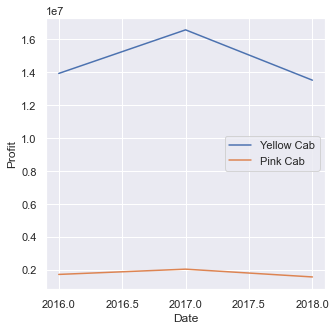

In [91]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.lineplot(data=yellow_yearly_profit, x='Date', y='Profit', label='Yellow Cab', ax=ax)
sns.lineplot(data=pink_yearly_profit, x='Date', y='Profit', label='Pink Cab', ax=ax)



#### Which company maximizes cab users at particular time periods?

In [23]:
yellow_cab_data['Date'].dtype

dtype('<M8[ns]')

In [31]:
yellow_monthly = yellow_cab_data.groupby((yellow_cab_data['Date'].dt.month))['CID'].nunique()
pink_monthly = pink_cab_data.groupby((pink_cab_data['Date'].dt.month))['CID'].nunique()

In [27]:
yellow_monthly

Date
1     12012
2     10371
3     11535
4     11607
5     12147
6     12332
7     13188
8     14197
9     15458
10    16232
11    16550
12    17526
Name: CID, dtype: int64

In [24]:
pink_monthly.describe()

count      12.000000
mean     6031.750000
std      2204.265952
min      3176.000000
25%      4295.500000
50%      5482.000000
75%      8162.000000
max      9275.000000
Name: CID, dtype: float64

In [30]:
cab_monthly = [yellow_monthly, pink_monthly]
result = pd.concat(cab_monthly)

In [32]:
df1 = pink_monthly.to_frame()


In [33]:
df2 = yellow_monthly.to_frame()

In [34]:
df = pd.concat([df1,df2], axis=0, ignore_index=False)
df['col'] = (len(df1)*(0,) + len(df2)*(1,))
df.reset_index(inplace=True)
df

,Date,CID,col
0,1,4607,0
1,2,3176,0
2,3,3874,0
3,4,3786,0
4,5,4436,0
5,6,5227,0
6,7,5737,0
7,8,6638,0
8,9,7988,0
9,10,8684,0


E:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


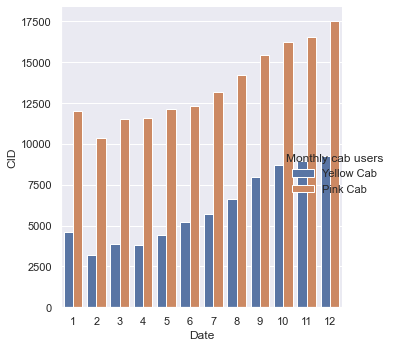

In [64]:
g = sns.factorplot(x='Date', y='CID', hue='col', kind='bar', data=df)

new_title = "Monthly cab users"
g._legend.set_title(new_title)
new_labels = ['Yellow Cab', 'Pink Cab']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

#### Next we will get the average users across the whole year for each company and see which one has the highest percentage of increase for the peak months (oct-dec)

In [35]:
pink_avg_users = df1["CID"].mean()

In [36]:
yellow_avg_users = df2["CID"].mean()

In [37]:
pink_nums = df1.values
pink_nums

array([[4607],
       [3176],
       [3874],
       [3786],
       [4436],
       [5227],
       [5737],
       [6638],
       [7988],
       [8684],
       [8953],
       [9275]], dtype=int64)

In [75]:
pct_chg_pink = []
for num in pink_nums:
    pct_chg_pink.append(((num[0]-pink_avg_users)/pink_avg_users) * 100)

In [76]:
pct_chg_pink

[-23.620839723131763,
 -47.34529779914619,
 -35.773200149210425,
 -37.232146557798316,
 -26.45583785800141,
 -13.341899117171632,
 -4.886641521946367,
 10.05098022961827,
 32.43254445227339,
 43.97148422928669,
 48.43121813735649,
 53.769635677871264]

In [78]:
yellow_nums = df2.values
pct_chg_yellow = []
for num in yellow_nums:
    pct_chg_yellow.append(((num[0]-yellow_avg_users)/yellow_avg_users) * 100)
pct_chg_yellow

[-11.652109956789555,
 -23.721614415739634,
 -15.160430265698263,
 -14.630872483221477,
 -10.659189114645583,
 -9.298519812448285,
 -3.002666176335387,
 4.418497747540682,
 13.693113910085502,
 19.38586007171095,
 21.72474027765009,
 28.903190217890963]

In [79]:
type(pct_chg_pink)

list

In [80]:
months = ["January", "February", "March", "April", "May", "June", "July", "August",
          "September", "October", "November", "December"]

In [82]:
df = pd.DataFrame({'Month':months, 'Yellow':np.reshape(pct_chg_yellow, 12, order='F'),
                  'Pink':np.reshape(pct_chg_pink, 12, order='F')})

In [83]:
df.head()

,Month,Yellow,Pink
0,January,-11.652110,-23.620840
1,February,-23.721614,-47.345298
2,March,-15.160430,-35.773200
3,April,-14.630872,-37.232147
4,May,-10.659189,-26.455838


In [86]:
dfm = df.melt('Month', var_name='cols', value_name='vals')

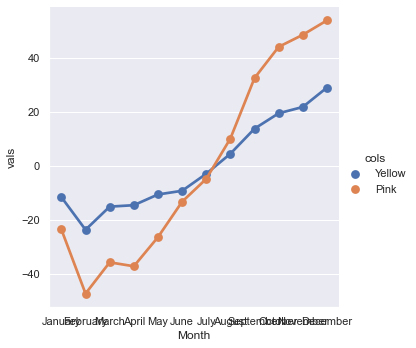

In [88]:
g = sns.catplot(x="Month", y="vals", hue='cols', data=dfm, kind='point')

#### This plot shows the pct change versus their average for each month. The pink company has the largest increase in volume during peak months (Oct - Dec), but also the biggest decrease during the slow months of january-may.

#### Next we will compare profits to the increase in cab users.

In [89]:
yellow_monthly_profit = yellow_cab_data.groupby(data_merged['Date'].dt.month).agg({'Profit': sum})
pink_monthly_profit = pink_cab_data.groupby(data_merged['Date'].dt.month).agg({'Profit': sum})

In [93]:
yellow_avg_prof = yellow_monthly_profit['Profit'].mean()
pink_avg_prof = pink_monthly_profit['Profit'].mean()

In [95]:
yellow_nums = yellow_monthly_profit.values
pink_nums = pink_monthly_profit.values

pct_prof_chg_pink = []
pct_prof_chg_yellow = []

for num in pink_nums:
    pct_prof_chg_pink.append(((num[0]-pink_avg_prof)/pink_avg_prof) * 100)
    
for num in yellow_nums:
    pct_prof_chg_yellow.append(((num[0]-yellow_avg_prof)/yellow_avg_prof) * 100)

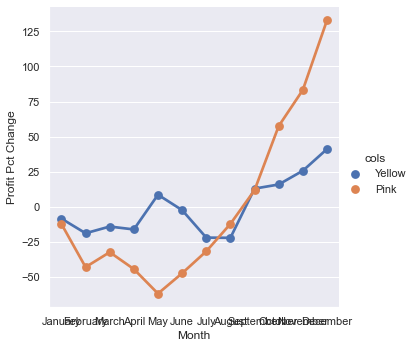

In [97]:
df = pd.DataFrame({'Month':months, 'Yellow':np.reshape(pct_prof_chg_yellow, 12, order='F'),
                  'Pink':np.reshape(pct_prof_chg_pink, 12, order='F')})
dfm = df.melt('Month', var_name='cols', value_name='Profit Pct Change')
g = sns.catplot(x="Month", y="Profit Pct Change", hue='cols', data=dfm, kind='point')


#### Pink Cab company utilizes the busy period more effectively than yellow cab, however, yellow cab is more consistent across the entire year, even during the slow period.

In [13]:
data_merged.head()

,CID,Gender,Age,Income,TID,Payment_Mode,Date,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Profit
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808


In [38]:
customer_data = data_merged[["CID", "Gender", "Age", "Income", "Payment_Mode", "City", "Profit"]]
customer_data.head()

,CID,Gender,Age,Income,Payment_Mode,City,Profit
0,29290,Male,28,10813,Card,ATLANTA GA,57.3150
1,29290,Male,28,10813,Cash,ATLANTA GA,281.2772
2,29290,Male,28,10813,Card,ATLANTA GA,194.6480
3,27703,Male,27,9237,Card,ATLANTA GA,23.6660
4,27703,Male,27,9237,Card,ATLANTA GA,253.9808


### Analyze based on Customer Base Demographics


In [39]:
customer_data['Income'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income, dtype: float64

#### We see the quartile values here, and will split groups among them to see profit based on income.

In [22]:
lower_class = customer_data.loc[customer_data['Income'] < 8500]
middle_class = customer_data.loc[(customer_data['Income'] >= 8500) & (customer_data['Income'] <= 21000)]
upper_class = customer_data.loc[customer_data['Income'] > 21000]

,CID,Age,Income,Profit
count,178114.000000,178114.000000,178114.000000,178114.000000
mean,19036.253916,35.296069,14729.001151,138.292671
std,20970.541707,12.589103,3599.017115,161.187299
min,1.000000,18.000000,8500.000000,-220.060000
25%,2688.000000,25.000000,11655.000000,28.188500
50%,7340.000000,33.000000,14703.000000,82.718200
75%,35611.750000,42.000000,17820.000000,191.488500
max,60000.000000,65.000000,21000.000000,1463.966000


In [25]:
profit_class = [lower_class['Profit'].mean(), middle_class['Profit'].mean(), upper_class['Profit'].mean()]

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


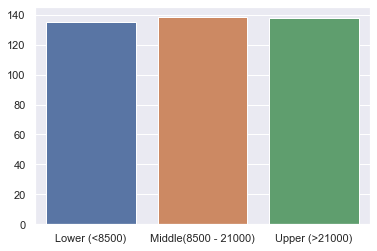

In [27]:
classes = ['Lower (<8500)', 'Middle(8500 - 21000)', 'Upper (>21000)']
sns.barplot(classes, profit_class)
plt.show()

#### Average profit of each class is very similar

Next we will check by city

In [37]:
unique_city_prof = customer_data.groupby(['City'], as_index=False)['Profit'].sum()

In [39]:
unique_city_prof.head()

,City,Profit
0,ATLANTA GA,8.424329e+05
1,AUSTIN TX,5.267010e+05
2,BOSTON MA,1.768719e+06
3,CHICAGO IL,3.387313e+06
4,DALLAS TX,1.128733e+06


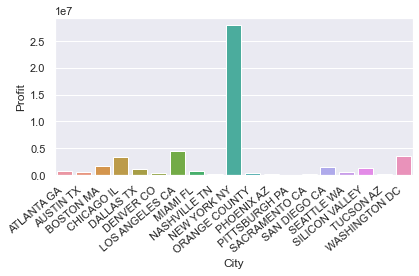

In [42]:
ax = sns.barplot(x='City', y='Profit', data=unique_city_prof)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


In [43]:
unique_city_info = pd.merge(city_data, unique_city_prof, on='City')

In [44]:
unique_city_info.head()

,City,Population,Users,Profit
0,NEW YORK NY,"8,405,837","302,149",2.796256e+07
1,CHICAGO IL,"1,955,130","164,468",3.387313e+06
2,LOS ANGELES CA,"1,595,037","144,132",4.411709e+06
3,MIAMI FL,"1,339,155","17,675",7.583012e+05
4,SILICON VALLEY,"1,177,609","27,247",1.316705e+06


In [52]:
print(unique_city_info.dtypes)

City           object
Population     object
Users          object
Profit        float64
dtype: object


In [55]:
unique_city_info['Users'] = unique_city_info['Users'].apply(lambda x: float(x.split()[0].replace(',', '')))
unique_city_info['Users'] = unique_city_info['Users'].astype(float)
unique_city_info['Profit_Per_User'] = unique_city_info['Profit']/unique_city_info['Users']
unique_city_info.head()

,City,Population,Users,Profit,Profit_Per_User
0,NEW YORK NY,"8,405,837",302149.0,2.796256e+07,92.545582
1,CHICAGO IL,"1,955,130",164468.0,3.387313e+06,20.595577
2,LOS ANGELES CA,"1,595,037",144132.0,4.411709e+06,30.608808
3,MIAMI FL,"1,339,155",17675.0,7.583012e+05,42.902475
4,SILICON VALLEY,"1,177,609",27247.0,1.316705e+06,48.324780


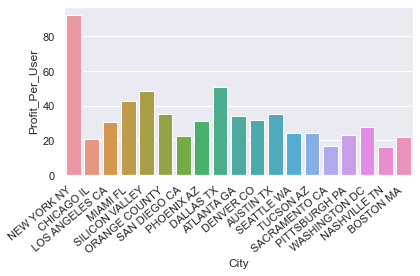

In [56]:
ax = sns.barplot(x='City', y='Profit_Per_User', data=unique_city_info)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


In [40]:
compdf = data_merged.groupby(["Company", "City"])["CID"].count()

In [41]:
compdf = compdf.to_frame()

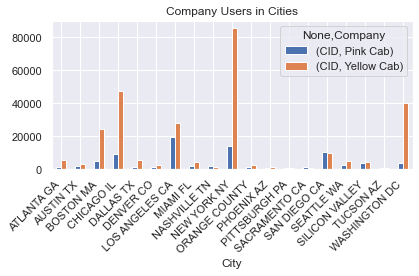

In [59]:
ax = compdf.unstack(level=0).plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.ylim(top = 90000)
plt.title("Company Users in Cities")
plt.tight_layout()
plt.show()

From the data, Yellow has more users in all but 3 cities, Nashville, San Diego, and Sacramento

### Now lets check cab customer retention rate

First we will find how many times a customer used the same company more than 5, and 10 times. After we find them, we will see if these users used the opposite company at all.

In [73]:
custID_compdf = data_merged[["CID", "Company"]]


pandas.core.frame.DataFrame

In [76]:
custId_group = custID_compdf.groupby(["Company"])
yellow_custs = custId_group.get_group('Yellow Cab')
pink_custs = custId_group.get_group('Pink Cab')

In [92]:
yellow_repeat_count = yellow_custs['CID'].value_counts()

In [79]:
pink_repeat_count = pink_custs['CID'].value_counts()

In [94]:
yellow_repeat_count = pd.Series.to_frame(yellow_repeat_count)

yellow_repeat_count['id'] = list(yellow_repeat_count.index)

In [101]:
pink_repeat_count = pd.Series.to_frame(pink_repeat_count)

pink_repeat_count['id'] = list(pink_repeat_count.index)

In [99]:
#Getting index of yellow_cab customers who used yellow cab more than 5 and 10 times
yell_list_5 = yellow_repeat_count.loc[yellow_repeat_count['CID'] >= 5, 'id']
yell_list_10 = yellow_repeat_count.loc[yellow_repeat_count['CID'] >= 10, 'id']

In [102]:
pink_list_5 = pink_repeat_count.loc[pink_repeat_count['CID'] >= 5, 'id']
pink_list_10 = pink_repeat_count.loc[pink_repeat_count['CID'] >= 10, 'id']

Percentage of each companies users that use the same cab at least 5 and 10 times

In [108]:
five_pct_yellow = len(yell_list_5) / len(yellow_repeat_count)
ten_pct_yellow = len(yell_list_10) / len(yellow_repeat_count)

five_pct_pink = len(pink_list_5) / len(pink_repeat_count)
ten_pct_pink = len(pink_list_10) / len(pink_repeat_count)

Text(0.5, 1.0, 'Percentage of Repeat Customers more than 5 and 10')

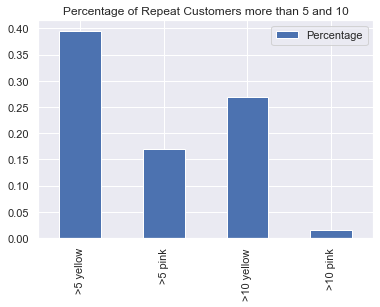

In [117]:
plot_data = pd.DataFrame({"Percentage": [five_pct_yellow,five_pct_pink,ten_pct_yellow, ten_pct_pink ]},
                         index= [">5 yellow", ">5 pink", ">10 yellow", ">10 pink"])
plot_data.plot(kind="bar")

plt.title("Percentage of Repeat Customers more than 5 and 10")

In [120]:
yell_list_5

494        494
1360      1360
1803      1803
636        636
126        126
         ...  
38204    38204
58806    58806
36209    36209
29186    29186
57299    57299
Name: id, Length: 15780, dtype: int64

In [147]:
y5_p = yell_list_5.isin(pink_list_5).value_counts()

In [141]:
p5_y = pink_list_5.isin(yell_list_5).value_counts()


In [138]:
y10_p = yell_list_10.isin(pink_list_5).value_counts()

In [140]:
p10_p = pink_list_10.isin(yell_list_5).value_counts()

In [145]:
df_cross = pd.concat([y5_p, p5_y, y10_p, p10_p], axis=1)

In [149]:
df_cross.columns = ['Y5 in p', 'P5 in y', 'Y10 in p', 'P10 in y']

In [153]:
#Transposing dataframe to make plotting easier
dft = df_cross.T



<AxesSubplot:>

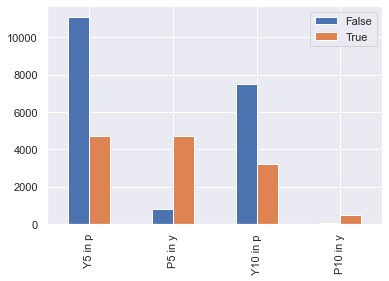

In [155]:
dft.plot(kind="bar")


The chart above shows the amount of users that used one cab company at least 5 or 10 times that also used the other cab company. From this chart we see that Yellow Cab as more loyal users, where as most of the frequent pink cab users also frequented yellow cab company. These users likely just got any cab available. Yellow cab retains more frequent users.

# Hypothesis

### Hypothesis 1: Does the season affect amount of Cab users?
    Yes! Colder seasons have significantly higher cab usage. This is likely a combination of users not wanting to walk in the cold, while increase of tourists for the holiday season increasing demand. 
    
### Hypothesis 2: Does the city affect profit margins for Cab company?
    Yes, the data shows that NYC Cab companies have an average of 80 profit per user while the rest of the country falls between 20 and 50 per user. Yellow Cab company has significantly more users in NYC which increases their profit margins considerably. 
    
### Hypothesis 3: Do customer loyalty affect each Cab company?
    Yes, the Yellow Cab Company has shown that its customers overwhelmingly stick with the Yellow Cab company, while the Pink Cab company most frequent users also frequent the Yellow Cab company. The profits per user for Yellow Cab company are also significatnly higher.
    
### Hypothesis 4: Does income of cab users affect the profit gained per trip?
    No. The data shows us that profit per user remains consistent with each income bracket of its users.
    
### Hypothesis 5: How does distance travelled for a ride impact the profit per ride?
    For both companies the average ride distance was similar, as was the tendency for profit to increase linearly with ride distance. However, the Yellow Cab company showed that it has significantly higher average profit per kilometer travelled than the Pink Cab Company. The Yellow Cab company utilizes distance travelled for profit much better than the Pink Cab Company

# Recommendation

From the findings, XYZ should invest in the Yellow Cab Company for the following reasons

    - Profit margins per user are much higher (160 vs 63) while simultaneously having a much higher # of users
    - The Yellow Cab Company operates in significantly more Cites
    - The Yellow Cab company has a higher user loyalty rate with nearly 70% of their frequent users (users with more than 5 trips) using only the Yellow Cab company, while the Pink Cab Company has a loyalty rate of roughly 10%
    - The most profitable city per user is NYC and the Yellow Cab company services over 85,000 users in NYC vs the Pink Cab company only servicing 16,000 users.